In [2]:
import lsdb

In [3]:
cat = lsdb.generate_catalog(1000, 1)
len(cat)

1000

(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Coverage MOC of generated_catalog'}>)

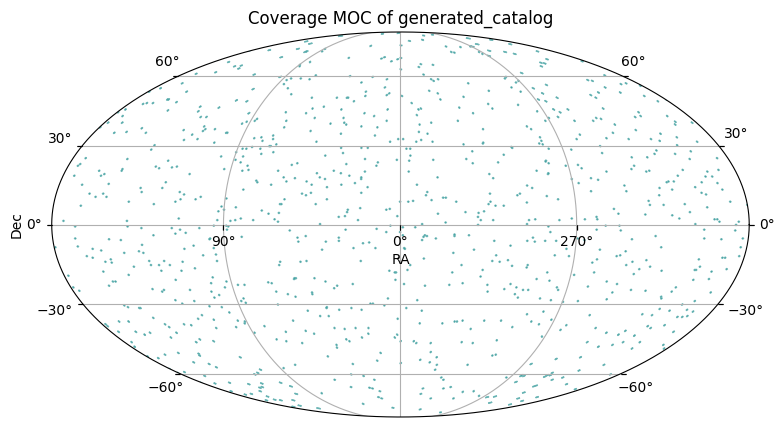

In [4]:
cat.plot_coverage()

In [5]:
cat.write_catalog("/tmp/test_cat", histogram_order=10, overwrite=True)

In [6]:
!tree -L 2 /tmp/test_cat

/tmp/test_cat
├── collection.properties
├── generated_catalog
│   ├── dataset
│   ├── hats.properties
│   ├── partition_info.csv
│   ├── point_map.fits
│   ├── properties
│   └── skymap.fits
└── generated_catalog_5arcs
    ├── dataset
    ├── hats.properties
    ├── partition_info.csv
    └── properties

5 directories, 9 files


/Users/smcmu/.pyenv/versions/3.12.10/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=12535) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [7]:
read_cat = lsdb.open_catalog("/tmp/test_cat")
read_cat

,ra,dec,id,a,b,nested
npartitions=12,,,,,,
"Order: 0, Pixel: 0",double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],"nested<t: [double], flux: [double], band: [str..."
"Order: 0, Pixel: 1",...,...,...,...,...,...
...,...,...,...,...,...,...
"Order: 0, Pixel: 10",...,...,...,...,...,...
"Order: 0, Pixel: 11",...,...,...,...,...,...


In [8]:
read_cat.margin

,ra,dec,id,a,b,nested
npartitions=0,,,,,,
Empty Catalog,double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],"nested<t: [double], flux: [double], band: [str..."


In [9]:
!du -h /tmp/test_cat/generated_catalog/*.fits

 24K	/tmp/test_cat/generated_catalog/point_map.fits
 24K	/tmp/test_cat/generated_catalog/skymap.fits


/Users/smcmu/.pyenv/versions/3.12.10/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=12535) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Coverage MOC of generated_catalog'}>)

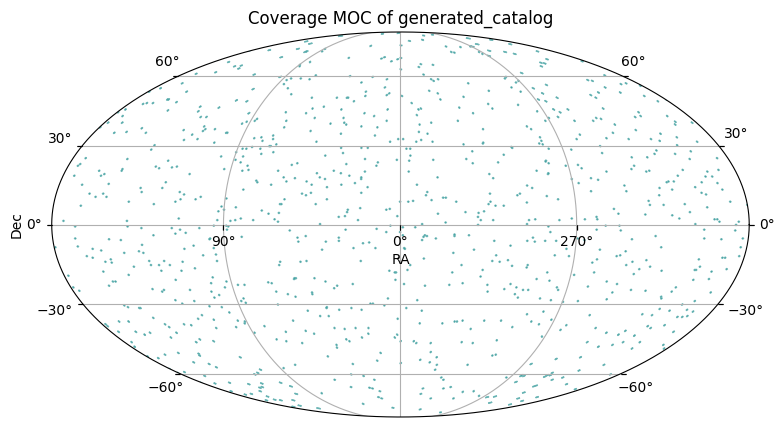

In [10]:
read_cat.plot_coverage()

In [12]:
from cdshealpix.skymap.skymap import SkymapImplicit, SkymapExplicit
import numpy as np

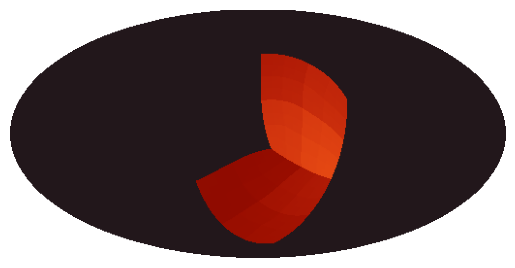

In [25]:
order = 7
arr = np.arange(12 * (4 ** order))
arr[0:10 * 4 ** order] = 0
sm = SkymapImplicit(arr, null_value=0)
sm.quick_plot()

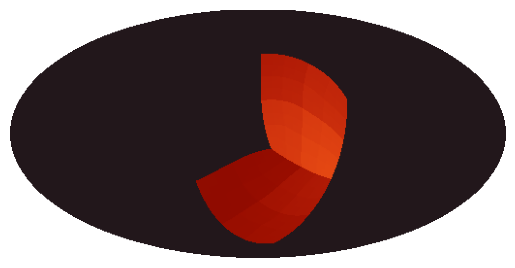

In [26]:
sm.to_fits("/tmp/test_skymap_imp.fits")
SkymapImplicit.from_fits("/tmp/test_skymap_imp.fits").quick_plot()

In [28]:
sm.to_explicit().to_fits("/tmp/test_skymap_exp.fits")

In [29]:
!ls -lh /tmp/*.fits

-rw-r--r--  1 smcmu  wheel   520K Dec 18 14:59 /tmp/test_skymap_exp.fits
-rw-r--r--  1 smcmu  wheel   1.5M Dec 18 14:59 /tmp/test_skymap_imp.fits


/Users/smcmu/.pyenv/versions/3.12.10/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=12535) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


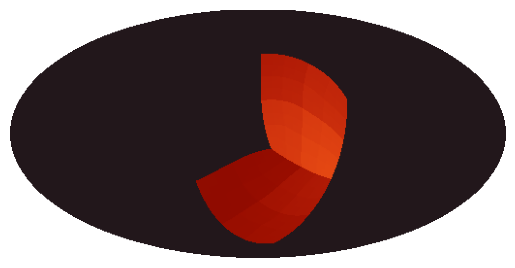

In [31]:
SkymapExplicit.from_fits("/tmp/test_skymap_exp.fits").to_implicit().quick_plot()

In [32]:
fractions = [0.1, 0.5, 0.7, 0.9]

In [33]:
for f in fractions:
    arr = np.arange(12 * (4 ** order))
    arr[0:int(f * len(arr))] = 0
    sm = SkymapImplicit(arr, null_value=0)
    sm.to_explicit().to_fits(f"/tmp/test_skymap_exp_{f}.fits")

In [34]:
!ls -lh /tmp/*.fits

-rw-r--r--  1 smcmu  wheel   520K Dec 18 14:59 /tmp/test_skymap_exp.fits
-rw-r--r--  1 smcmu  wheel   2.7M Dec 18 15:00 /tmp/test_skymap_exp_0.1.fits
-rw-r--r--  1 smcmu  wheel   1.5M Dec 18 15:00 /tmp/test_skymap_exp_0.5.fits
-rw-r--r--  1 smcmu  wheel   928K Dec 18 15:00 /tmp/test_skymap_exp_0.7.fits
-rw-r--r--  1 smcmu  wheel   315K Dec 18 15:00 /tmp/test_skymap_exp_0.9.fits
-rw-r--r--  1 smcmu  wheel   1.5M Dec 18 14:59 /tmp/test_skymap_imp.fits


/Users/smcmu/.pyenv/versions/3.12.10/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=12535) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()
